In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
X = data.drop(['Profit', 'State'], axis=1)
y = data.iloc[:, 4]

### Dataset spliting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35, 3), (15, 3), (35,), (15,))

### Training

In [13]:
model = RandomForestRegressor(max_depth=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Testing

In [14]:
y_pred = model.predict(X_test)

In [19]:
model.predict(X_test)

array([130505.648,  90779.466,  98697.194,  45836.941, 125808.379,
        48962.091, 120528.28 , 100326.788,  91473.302, 120368.373,
       130505.648, 159550.079,  96109.323, 133685.169, 167085.049])

In [20]:
y_test.values

array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
       105733.54, 107404.34,  97427.84, 122776.86, 141585.52, 166187.94,
        89949.14, 152211.77, 182901.99])

In [29]:
testXpred = {'y_test':y_test.values, 'y_pred': y_pred}
testXpred = pd.DataFrame(testXpred)
testXpred

,y_test,y_pred
0,134307.35,130505.648
1,81005.76,90779.466
2,99937.59,98697.194
3,64926.08,45836.941
4,125370.37,125808.379
5,35673.41,48962.091
6,105733.54,120528.280
7,107404.34,100326.788
8,97427.84,91473.302
9,122776.86,120368.373


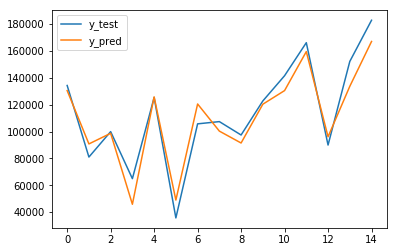

In [31]:
testXpred.plot()

In [33]:
model.score(X_train, y_train)

0.9845803895878964

In [34]:
model.score(X_test, y_test)

0.9165549241529047

### Leveraging GridSearchCV for parameter selection

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35, 3), (15, 3), (35,), (15,))

In [36]:
parameter = {
    "n_estimators": [10, 30, 50],
    "max_depth": [20, 40, 60],
    "max_features": [0.6, 0.8, 1],
    "min_samples_leaf": [1, 5, 10]
}

model = GridSearchCV(RandomForestRegressor(), parameter, n_jobs=-1, cv=7, verbose=1)
model.fit(X_train, y_train)
model.best_params_

Fitting 7 folds for each of 81 candidates, totalling 567 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 567 out of 567 | elapsed:    3.5s finished


{'max_depth': 20,
 'max_features': 0.8,
 'min_samples_leaf': 1,
 'n_estimators': 30}

In [37]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9847152293829737, 0.9450459248384807)

In [40]:
y_test.values, y_pred

(array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
        105733.54, 107404.34,  97427.84, 122776.86, 141585.52, 166187.94,
         89949.14, 152211.77, 182901.99]),
 array([130505.648,  90779.466,  98697.194,  45836.941, 125808.379,
         48962.091, 120528.28 , 100326.788,  91473.302, 120368.373,
        130505.648, 159550.079,  96109.323, 133685.169, 167085.049]))

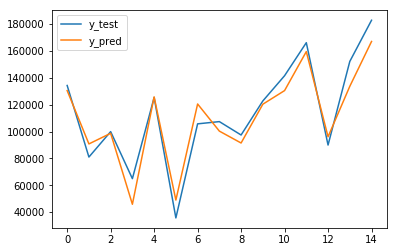

In [41]:
testXpred_grid = {'y_test':y_test.values, 'y_pred': y_pred}
testXpred_grid = pd.DataFrame(testXpred_grid)
testXpred_grid.plot()

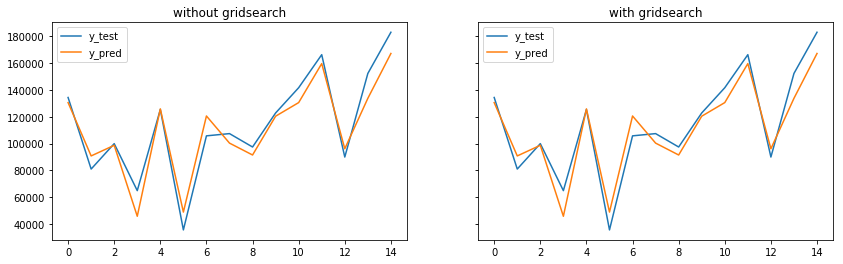

In [48]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(14,4))
testXpred.plot(ax=ax[0], title='without gridsearch')
testXpred_grid.plot(ax=ax[1], title='with gridsearch')